# In this example we use the MdB class to access a database of models. 

The dabase is 3MdB, described here: https://sites.google.com/site/mexicanmillionmodels/the-different-projects/hii_chim

In [4]:
%matplotlib inline 
import numpy as np
import matplotlib.pyplot as plt
import pyCloudy as pc
import pandas as pd
import pymysql 

In [5]:
# Defining the connection parameters.
import os
host = os.environ['MdB_HOST']
user = os.environ['MdB_USER']
passwd = os.environ['MdB_PASSWD']
db=os.environ['MdB_DB_17']    

In [8]:
co = pymysql.connect(host=host, db=db, user=user, passwd=passwd)
res = pd.read_sql("""SELECT
    12+oxygen AS OH, 
    nitrogen-oxygen AS NO, 
    lumi AS logU, 
    BLND_372700A/H__1_486133A AS O2, 
    BLND_436300A/H__1_486133A AS O3_4363, 
    O__3_500684A/H__1_486133A AS O3, 
    N__2_658345A/H__1_486133A AS N2, 
    (S__2_671644A + S__2_673082A)/H__1_486133A AS S2
FROM tab_17
WHERE ref = 'BOND'
""", con=co) 

In [9]:
print(len(res))

113420


In [10]:
res

,OH,NO,logU,O2,O3_4363,O3,N2,S2
0,9.4,-1.00,47.532553,1.996031,6.364626e-05,1.447794e-01,1.426077,1.922521
1,9.2,-0.50,43.262277,0.272503,1.871795e-07,8.125187e-04,1.117005,0.677754
2,9.4,0.00,47.532553,0.009758,1.062763e-09,5.001466e-07,0.016908,0.004035
3,9.2,0.00,47.532553,0.137288,2.965965e-07,4.720362e-03,2.256497,0.385450
4,9.4,-1.00,47.532553,0.293409,2.423485e-08,2.649722e-04,0.438272,0.957386
...,...,...,...,...,...,...,...,...
113415,9.4,-0.25,47.532553,0.029679,4.341928e-11,2.225320e-06,0.354148,0.142798
113416,9.2,-0.25,47.532553,0.104207,9.519672e-10,1.782989e-05,1.095120,0.418765
113417,9.2,-0.25,47.532553,0.948997,1.291271e-05,4.281305e-02,4.489167,1.296916
113418,9.2,-0.25,47.532553,0.435569,1.489141e-06,9.202054e-03,2.744305,0.869078


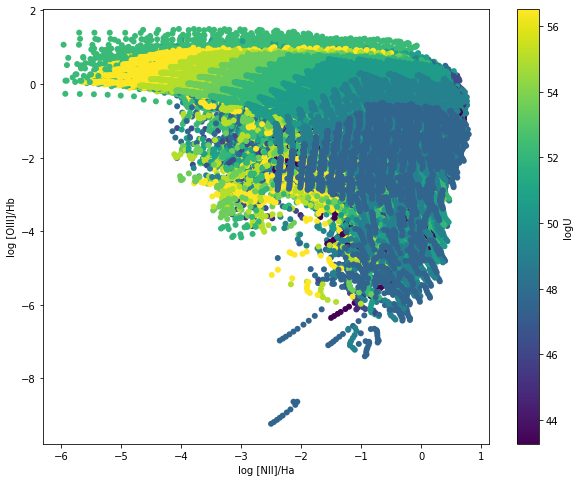

In [11]:
plt.figure(figsize=(10, 8))
plt.scatter(np.log10(res['N2']), np.log10(res['O3']), c=res['logU'], edgecolor = 'none')
plt.xlabel('log [NII]/Ha')
plt.ylabel('log [OIII]/Hb')
cb = plt.colorbar()
cb.set_label('logU');

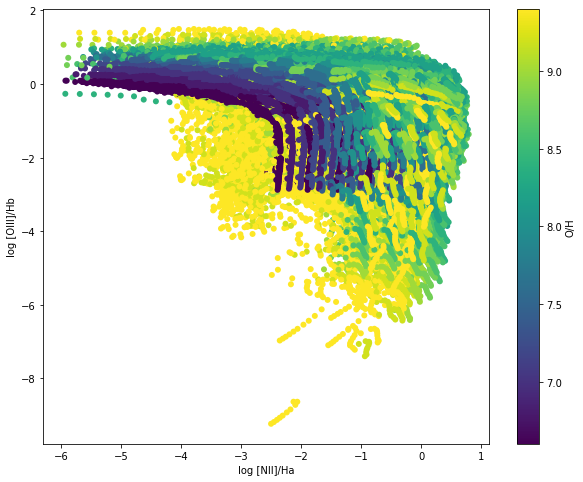

In [12]:
plt.figure(figsize=(10, 8))
plt.scatter(np.log10(res['N2']), np.log10(res['O3']), c=res['OH'], edgecolor = 'none')
plt.xlabel('log [NII]/Ha')
plt.ylabel('log [OIII]/Hb')
cb = plt.colorbar()
cb.set_label('O/H');

In [13]:
res = pd.read_sql("SELECT count(*) as N FROM tab_17 WHERE ref like 'PNe_2020'", con=co)
print("Total number of models with ref='PNe_2020': {}".format(res.N.values[0]))

Total number of models with ref='PNe_2020': 724386


In [16]:
# Query the database
com1 = 'B' # Blackbody
com2 = 'C' # Constant density
com4 = 'S' # Solar metallicity
com5 = 'N' # No dust
com6 = 1 # selected models
res = pd.read_sql("""SELECT
    A_HYDROGEN_vol_1, A_HELIUM_vol_1, A_HELIUM_vol_2, A_CARBON_vol_2, A_NITROGEN_vol_1, A_OXYGEN_vol_1,A_OXYGEN_vol_2,
    A_NEON_vol_2, A_NEON_vol_4, A_SULPHUR_vol_1, A_SULPHUR_vol_2, A_CHLORINE_vol_1, A_CHLORINE_vol_2, A_CHLORINE_vol_3,
    A_ARGON_vol_2, A_ZINC_vol_3, A_IRON_vol_2, A_NICKEL_vol_2, MassFrac, atm1
FROM tab_17, abion_17
WHERE tab_17.ref like 'PNe_2020'
    AND tab_17.N = abion_17.N
    AND com1 like '{}%'
    AND com2 like '{}%'
    AND com4 = '{}'
    AND com5 = '{}' 
    AND com6 = {}
    """.format(com1, com2, com4, com5, com6),
                  con=co)

In [17]:
print(len(res))

8380


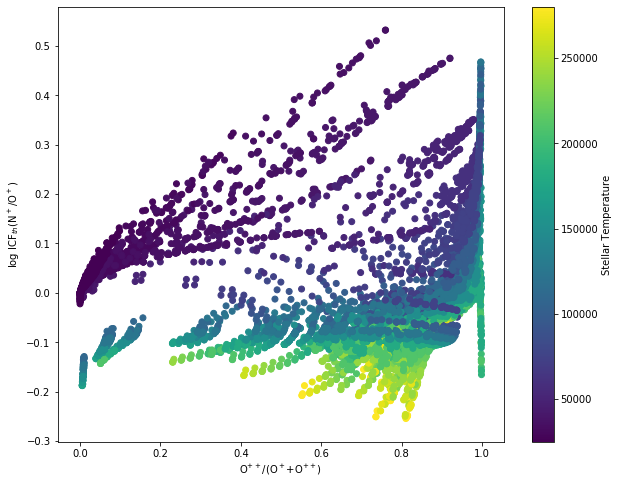

In [18]:
plt.figure(figsize=(10, 8))
plt.scatter(res['A_OXYGEN_vol_2']/(res['A_OXYGEN_vol_1']+res['A_OXYGEN_vol_2']), 
                np.log10(res['A_OXYGEN_vol_1']/res['A_NITROGEN_vol_1']), c=res['atm1'])
plt.xlabel(r'O$^{++}$/(O$^+$+O$^{++}$)')
plt.ylabel(r'log ICF$_{th}$(N$^+$/O$^+$)')
cb = plt.colorbar()
cb.set_label('Stellar Temperature')